torch.Size([2, 100, 64]) torch.Size([100, 1, 64])
torch.Size([2, 100, 64])


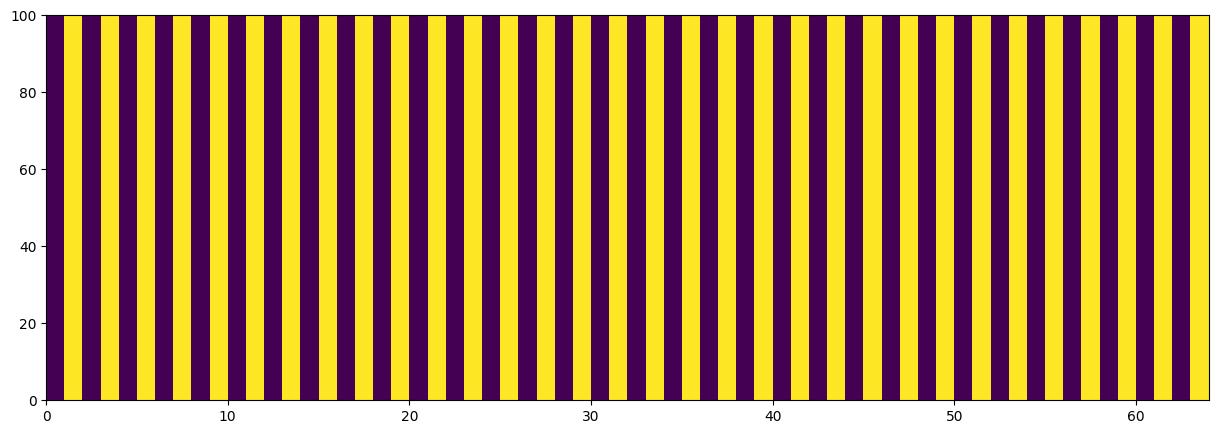

In [6]:
import torch
import math

class SinusoidalPositionalEncoding(torch.nn.Module):
    def __init__(self, dim, max_len=5000):
        super(SinusoidalPositionalEncoding, self).__init__()
        
        # Create a long enough P matrix
        pe = torch.zeros(max_len, dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, dim, 2).float() * (-math.log(10000.0) / dim))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)
    
    def forward(self, x):
        # x.shape[0] is the sequence length
        print(x.shape, self.pe.shape)
        return x + self.pe[:x.size(0), :]

# Example usage
bs = 2
length = 100
dim = 64

# Create random tensor with shape (bs, length, dim)
# x = torch.randn(bs, length, dim)
x = torch.zeros(bs, length, dim)

# Create sinusoidal positional encoding
pos_encoding = SinusoidalPositionalEncoding(dim=dim, max_len=length)

# Apply positional encoding to x
x_pos = pos_encoding(x)
print(x_pos.shape)  # Should print torch.Size([bs, length, dim])

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.pcolormesh(x_pos[0].detach().numpy(), cmap='viridis')

torch.Size([2, 100, 64])


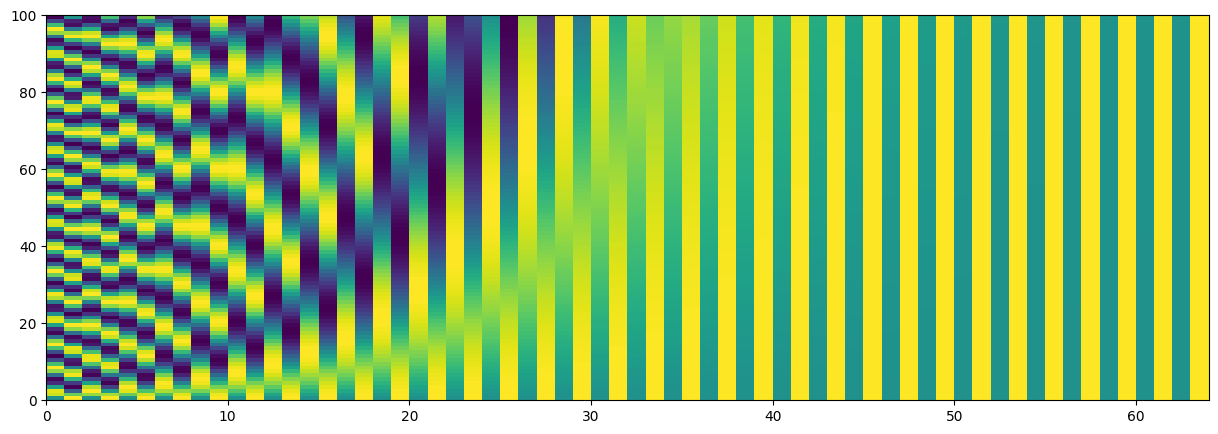

In [4]:
import torch
import math

class SinusoidalPositionalEncoding(torch.nn.Module):
    def __init__(self, dim, max_len=5000):
        super(SinusoidalPositionalEncoding, self).__init__()
        
        # Create a long enough P matrix
        pe = torch.zeros(max_len, dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, dim, 2).float() * (-math.log(10000.0) / dim))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)
    
    def forward(self, x):
        # x.shape[1] is the sequence length
        return x + self.pe[:, :x.size(1), :]

# Example usage
bs = 2
length = 100
dim = 64

# Create random tensor with shape (bs, length, dim)
# x = torch.randn(bs, length, dim)
x = torch.zeros(bs, length, dim)

# Create sinusoidal positional encoding
pos_encoding = SinusoidalPositionalEncoding(dim=dim, max_len=length)

# Apply positional encoding to x
x_pos = pos_encoding(x)
print(x_pos.shape)  # Should print torch.Size([bs, length, dim])

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.pcolormesh(x_pos[0].detach().numpy(), cmap='viridis')

torch.Size([2, 100, 64])


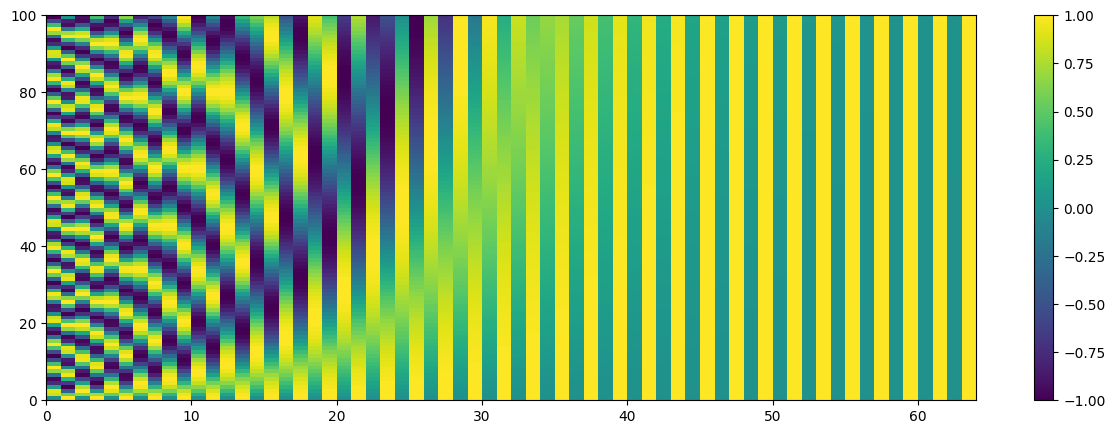

In [11]:
import torch
import torch.nn as nn
import math

class SinusoidalPositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(SinusoidalPositionalEncoding, self).__init__()
        # Create a long enough 'pe' matrix with positional encodings
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        # Register as a buffer in PyTorch (not a parameter, but should be part of the state)
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        Args:
            x: Tensor, shape [batch_size, sequence_length, embedding_dim]
        """
        # Add positional encoding to input tensor 'x'
        x = x + self.pe[:, :x.size(1), :]
        return x


# Example usage
bs = 2
length = 100
dim = 64

# Create random tensor with shape (bs, length, dim)
# x = torch.randn(bs, length, dim)
x = torch.zeros(bs, length, dim)

# Create sinusoidal positional encoding
pos_encoding = SinusoidalPositionalEncoding(dim, max_len=length)

# Apply positional encoding to x
x_pos = pos_encoding(x)
print(x_pos.shape)  # Should print torch.Size([bs, length, dim])

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.pcolormesh(x_pos[0].detach().numpy(), cmap='viridis')
plt.colorbar()